# THIS IS ABOUT PORTFOLIO OPTIMIZATION

Define libraries required

In [1]:
import yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

C:\Users\Pepe\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


Set start and end dates for the timeframe I'm interested on

In [2]:
end_date=datetime.utcnow().strftime('%Y-%m-%d')

In [3]:
start_date=(datetime.now() - relativedelta(months=60)).strftime('%Y-%m-%d')

Set and download the required tickers

In [4]:
afl= yfinance.download("AFL", start=start_date,end=end_date)
afg= yfinance.download("AFG", start=start_date,end=end_date)
all= yfinance.download("ALL", start=start_date,end=end_date)
cinf= yfinance.download("CINF", start=start_date,end=end_date)
cna= yfinance.download("CNA", start=start_date,end=end_date)
mkl= yfinance.download("MKL", start=start_date,end=end_date)
trv= yfinance.download("TRV", start=start_date,end=end_date)
sp500= yfinance.download("SPY", start=start_date,end=end_date)
vix= yfinance.download("VIX", start=start_date,end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
afl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,36.494999,36.945000,36.459999,36.775002,32.671940,7509000
2017-04-11,36.650002,36.875000,36.564999,36.875000,32.760773,3798000
2017-04-12,36.584999,36.830002,36.505001,36.674999,32.583084,4409400
2017-04-13,36.575001,36.810001,36.494999,36.500000,32.427616,3011800
2017-04-17,36.575001,36.764999,36.555000,36.764999,32.663052,3990600
...,...,...,...,...,...,...
2022-04-04,64.620003,64.660004,63.279999,63.610001,63.610001,1882700
2022-04-05,63.610001,64.349998,63.270000,63.770000,63.770000,1864500
2022-04-06,63.880001,65.220001,63.480000,65.070000,65.070000,3471500


In [6]:

# from matplotlib import dates

# plt.figure(figsize=(14, 8), dpi=300)
# ax = tgt["Adj Close"].plot()

# ax.xaxis.set_major_locator(dates.YearLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

# plt.savefig("tgt.png")

Create new field that calculates percentage changes one day to the next

In [7]:
afl["Daily Return"] = afl["Adj Close"].pct_change(1)
afg["Daily Return"] = afg["Adj Close"].pct_change(1)
all["Daily Return"] = all["Adj Close"].pct_change(1)
cinf["Daily Return"] = cinf["Adj Close"].pct_change(1)
cna["Daily Return"] = cna["Adj Close"].pct_change(1)
mkl["Daily Return"] = mkl["Adj Close"].pct_change(1)
trv["Daily Return"] = trv["Adj Close"].pct_change(1)

Create dataframes of one column corresponding to the close-date price for each stock

In [8]:
afl_1=afl['Adj Close'] 
afg_1=afg['Adj Close'] 
all_1=all['Adj Close'] 
cinf_1=cinf['Adj Close'] 
cna_1=cna['Adj Close'] 
mkl_1=mkl['Adj Close'] 
trv_1=trv['Adj Close'] 

Create dataframe with close date price for each stock

In [9]:
# retail = pd.concat([ry_1,bac_1,bns_1,bmo_1,cm_1, jpm_1,wfc_1, c_1],axis=1)
retail = pd.concat([afl_1, afg_1,all_1,cinf_1,cna_1,mkl_1, trv_1],axis=1)

# Make sure to rename columns rather than just all "adjusted close"

retail.columns = ['AFL', 'AFG','ALL','CINF','CNA','MKL', 'TRV']

In [10]:
retail

,AFL,AFG,ALL,CINF,CNA,MKL,TRV
Date,,,,,,,
2017-04-10,32.671940,62.689739,73.150581,62.094425,32.431938,976.799988,107.628036
2017-04-11,32.760773,63.009949,72.979767,62.225166,32.166576,968.340027,107.699127
2017-04-12,32.583084,62.598457,72.799950,61.771938,32.247662,966.679993,107.939087
2017-04-13,32.427616,61.914867,72.449287,61.414551,31.915970,961.820007,107.112602
2017-04-17,32.663052,62.844025,73.276466,62.408230,32.417183,970.000000,108.347862
...,...,...,...,...,...,...,...
2022-04-04,63.610001,143.839996,137.089996,135.130005,48.209999,1476.209961,181.820007
2022-04-05,63.770000,144.289993,137.240005,135.279999,47.939999,1473.689941,181.389999
2022-04-06,65.070000,145.639999,139.020004,137.369995,48.009998,1495.530029,182.580002


In [11]:
#listOfStr=df.columns

In [12]:
#listOfStr

In [13]:
#dictOfWords = { i : listOfStr[i] for i in range(0, len(listOfStr) ) }

In [14]:
#dictOfWords

Create dataframe retail_results as daily percentage change (dropping also empty values)

In [15]:
retail_returns = retail.pct_change(1).dropna()
retail_returns

,AFL,AFG,ALL,CINF,CNA,MKL,TRV
Date,,,,,,,
2017-04-11,0.002719,0.005108,-0.002335,0.002106,-0.008182,-0.008661,0.000661
2017-04-12,-0.005424,-0.006531,-0.002464,-0.007284,0.002521,-0.001714,0.002228
2017-04-13,-0.004771,-0.010920,-0.004817,-0.005786,-0.010286,-0.005028,-0.007657
2017-04-17,0.007260,0.015007,0.011417,0.016180,0.015704,0.008505,0.011532
2017-04-18,0.004760,-0.003062,-0.014601,-0.014525,-0.003865,-0.001897,-0.009596
...,...,...,...,...,...,...,...
2022-04-04,-0.018970,-0.029551,-0.017558,-0.021294,-0.025076,-0.011391,-0.018515
2022-04-05,0.002515,0.003128,0.001094,0.001110,-0.005601,-0.001707,-0.002365
2022-04-06,0.020386,0.009356,0.012970,0.015449,0.001460,0.014820,0.006560


Plot them all together

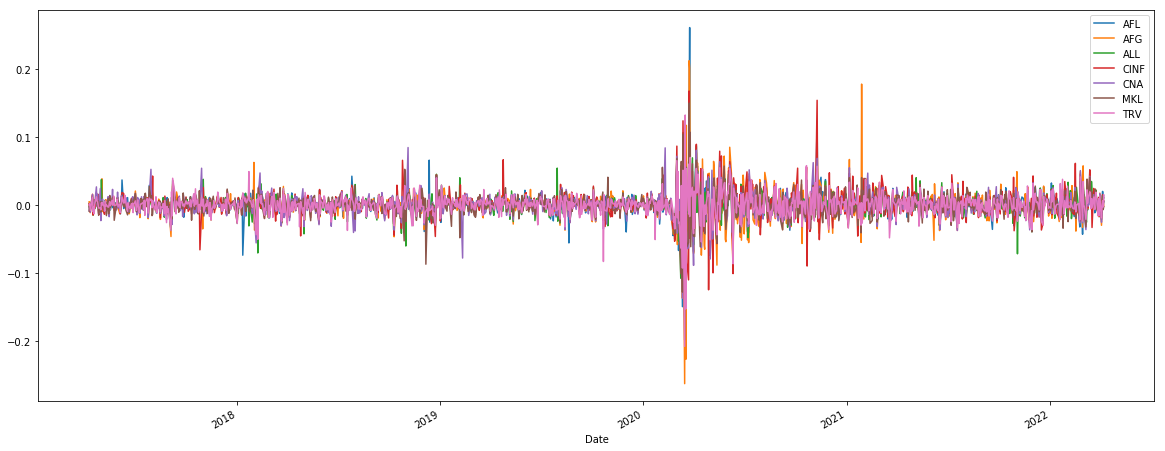

In [16]:
retail_returns.plot(figsize=(20,8))

Testing cumulative percentage for just AFG and MLK

In [17]:
cumul_return_AFG = (1 + retail_returns['AFG']).cumprod() - 1
cumul_return_perc_AFG = cumul_return_AFG*100
cumul_return_MKL = (1 + retail_returns['MKL']).cumprod() - 1
cumul_return_perc_MKL = cumul_return_MKL*100

In [18]:
np.dot([1,0,0,0, 0, 0, 0],retail_returns.transpose())
# ['AFL', AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV']

array([ 0.00271893, -0.00542382, -0.00477143, ...,  0.02038575,
        0.00153678,  0.00537055])

Create equally weighted portfolio (for the 7 stocks)

In [19]:
N = len(retail_returns.columns)
equal_weights = N * [1/N] # Shows 1/7, 7 times. Its not multiplication, but repetition! 7*["A"]
equal_weights

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285]

In [20]:
equal_returns = np.dot(equal_weights,retail_returns.transpose())
equal_returns

array([-0.00122647, -0.00266678, -0.00703775, ...,  0.01157171,
       -0.00029171,  0.00703131])

In [21]:
cum_equal_returns =   (1 + equal_returns).cumprod() - 1
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = retail_returns.index

Check how the equally weighted returns portfolio would look like

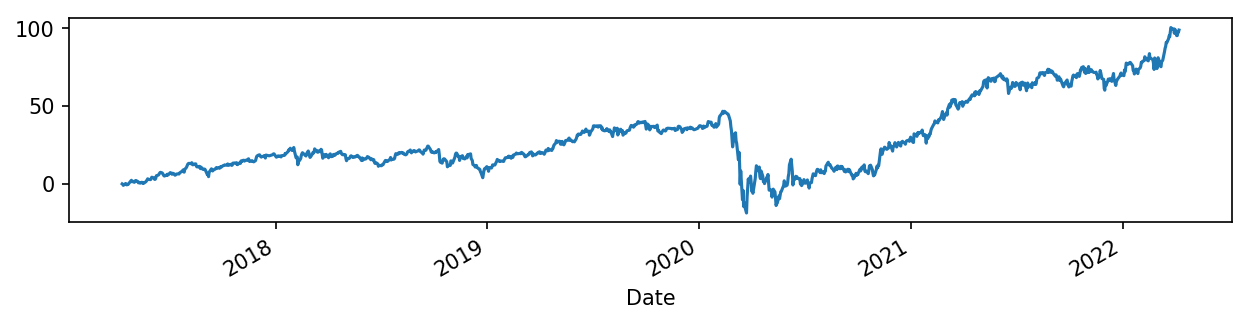

In [22]:
plt.figure(dpi=150)
cum_equal_returns_perc.plot(figsize=(10,2))

Plot and compare equally weighted vs two specific stocks

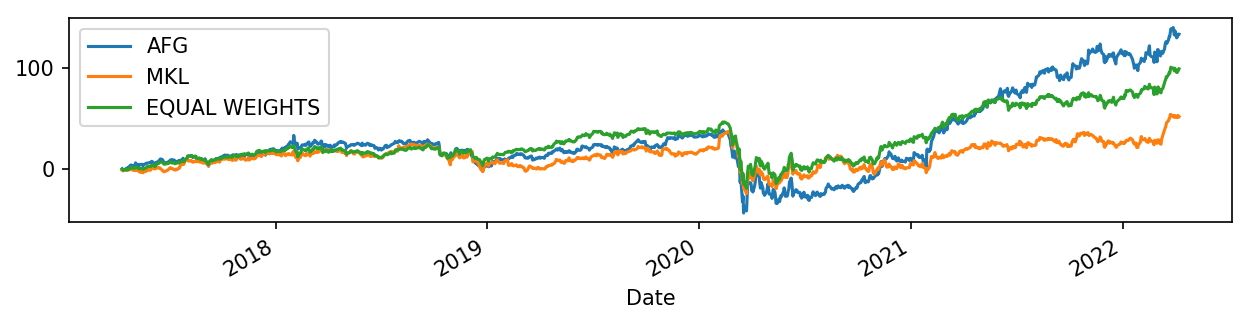

In [23]:
plt.figure(dpi=150)
cumul_return_perc_AFG.plot(figsize=(10,2),label='AFG')
cumul_return_perc_MKL.plot(figsize=(10,2),label='MKL')
cum_equal_returns_perc.plot(figsize=(10,2),label='EQUAL WEIGHTS')
plt.legend()

AFG seems to perform better than the equally weighted portfolio

Look now to start calculating optimized weights for the portfolio

In [24]:
log_rets = np.log(retail/retail.shift(1))

In [25]:
N = len(retail.columns)

weights = np.random.random(N)

In [26]:
weights = weights/ np.sum(weights)

In [27]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

To note that the multiplication for 252 is to calculate an annualized figur (working days when WS is opened)

In [28]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 

In [29]:
log_rets_cov = log_rets.cov()

Definte the volatility function to be used

In [30]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

Calculate volatility of the equally weighted portfolio

In [31]:
calculate_volatility(weights,log_rets_cov)

0.26432307980886577

In [32]:
log_rets = np.log(retail/retail.shift(1))
log_rets_cov = log_rets.cov()

Run simulation for 12000 scenarios

In [33]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(12000):
    # This may take awhile!
    # N has to be equal to the number of stocks considered (7 in this case)
    weights = gen_weights(N=7)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

Caculate sharpe ratios

In [34]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

Visualize the scatter plot of scenarios previously simulated for expected returns vs Expected volatility (color graded by Sharpe ratio)

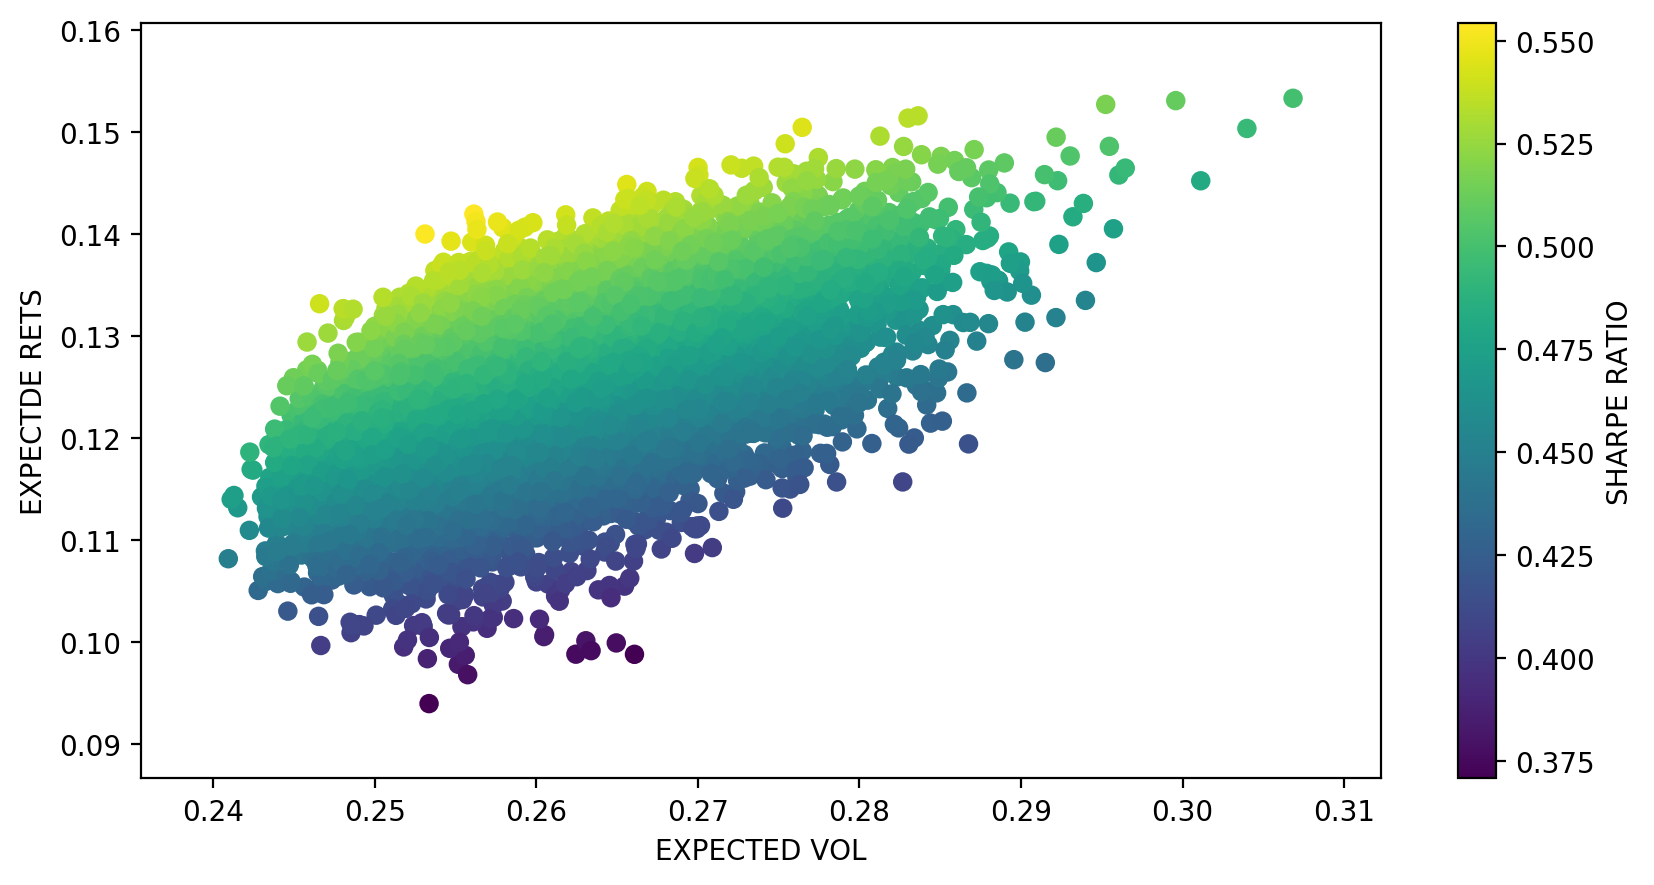

In [35]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

Calculate initial weights of the portfolio

In [36]:
mc_weights[np.argmax(mc_sharpe_ratios)]
# ['AFL', 'AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV']

array([0.10013798, 0.10458887, 0.39456156, 0.30528997, 0.00325962,
       0.04242096, 0.04974105])

In [37]:
from scipy.optimize import minimize

Import the optimize/minimize library and define the function to minimize

In [38]:
def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [39]:
bounds = tuple((0,1) for n in range(N))
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [40]:
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [41]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

     fun: -0.567149521636744
     jac: array([ 3.58074903e-05,  4.93973494e-05,  3.79905105e-05, -7.99521804e-05,
        1.79271370e-01,  1.62548408e-01,  7.46708438e-02])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([7.57530541e-02, 9.70844741e-02, 4.97101089e-01, 3.30061383e-01,
       1.07986536e-16, 1.24900090e-16, 8.13151629e-17])

In [42]:
# np.sum(array([2.44596151e-01, 1.33122616e-01, 9.86623977e-18, 3.79470760e-18,
#        3.60227557e-01, 0.00000000e+00, 2.62053677e-01, 5.36680075e-18]))

In [43]:
retail.columns

Index(['AFL', 'AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV'], dtype='object')

Plot the retail portfolio

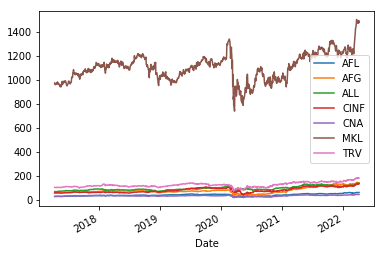

In [44]:
retail.plot()

## Let's now assess efficient frontier to be able to decide the level of risk (volatility) that will drive a specific return. This is normally define in the frontier of the scatter plot.

# Efficient Frontier
The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier: https://en.wikipedia.org/wiki/Efficient_frontier

### Set the parameters depending on the previous graph to identify the frontier and "play" with the combination of returns/volatility as well as the specific Sharpe ratio

In [45]:
expected_returns_range = np.linspace(0.11,0.16,100)

In [46]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [47]:
def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

# Now loop for different expected returns:

In [48]:
frontier_volatility = []
portfolio_holdings = []
for possible_return in expected_returns_range:
    # function for return
    
    
    result = minimize(calculate_volatility,equal_weights,bounds=bounds,constraints=constraints)
    
    frontier_volatility.append(result['fun'])
    portfolio_holdings.append(result['x'])

### Plot the Efficient Frontier

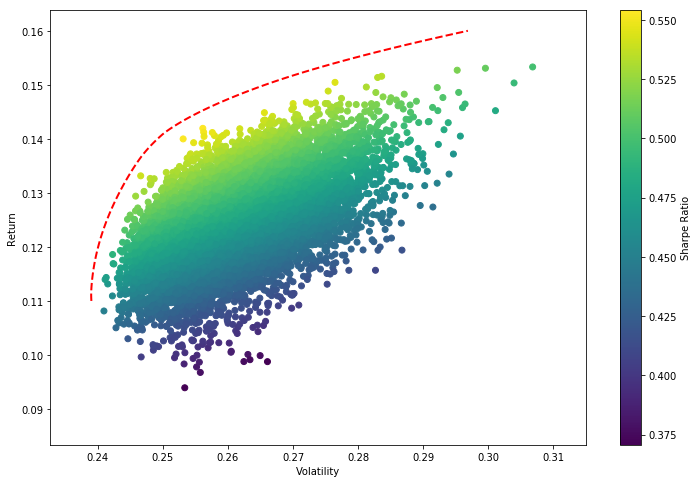

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)

In [50]:
retail.columns

Index(['AFL', 'AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV'], dtype='object')

In [51]:
portfolio_holdings[0]
# ['AFL', AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV']

array([4.69039833e-03, 2.34458720e-18, 4.74748600e-01, 2.16840434e-19,
       1.99729390e-01, 1.77812236e-01, 1.43019375e-01])

In [52]:
frontier_vol=np.array(frontier_volatility)

In [53]:
frontier_vol

array([0.23900405, 0.23898336, 0.23897452, 0.2389771 , 0.23899109,
       0.23901612, 0.23904745, 0.23908456, 0.23912703, 0.23917689,
       0.23922986, 0.23929027, 0.23935477, 0.23942466, 0.23950005,
       0.23958093, 0.2396673 , 0.23975916, 0.23985649, 0.23995929,
       0.24006756, 0.24018128, 0.24030045, 0.24042508, 0.24055514,
       0.24069064, 0.24083158, 0.24097794, 0.24112972, 0.24128692,
       0.24144952, 0.24161751, 0.24179088, 0.24196962, 0.24215371,
       0.24234302, 0.24253729, 0.24273746, 0.2429426 , 0.24315307,
       0.2433688 , 0.24358979, 0.24381602, 0.24404746, 0.24428411,
       0.24452594, 0.24477313, 0.24502583, 0.24528661, 0.24555587,
       0.24583356, 0.24611866, 0.24641282, 0.24672203, 0.24705163,
       0.24740401, 0.24777493, 0.24816513, 0.24857319, 0.24900331,
       0.24945277, 0.24992247, 0.2504573 , 0.2510589 , 0.25169994,
       0.25237681, 0.25308997, 0.25383794, 0.25462187, 0.25544042,
       0.2562938 , 0.25718178, 0.25810305, 0.25905805, 0.26004

### Look at the cases with volatility above 0.235

In [54]:
np.where(frontier_vol>0.235)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int64),)

In [55]:
retail.columns

Index(['AFL', 'AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV'], dtype='object')

#### Look at the weights for each stock for the 66th case

In [56]:
portfolio_holdings[80]
# ['AFL', AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV']

array([0.00000000e+00, 2.01103857e-01, 4.15310351e-01, 3.83585793e-01,
       1.61820362e-17, 5.93114669e-18, 0.00000000e+00])

In [57]:
#portfolio_holdings[90]
# ['AFL', AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV']

For position 80, the biggest proposed weight for such volatility/return is for ALL, followed by CINF

Let's check the volatility for case 80

In [58]:
frontier_volatility[80]

0.2666676111691552

Let's check return for case 80

In [59]:
expected_returns_range[80]

0.1504040404040404

# CAPITAL ASSETS PRICING MODEL (CAPE for alpha and beta)

### To assess the alpha and beta for each stock

Define the function to compute the cumulative function

In [60]:
def compute_cumulative(data, get_absolute=True):
    initial_price = data["Adj Close"].iloc[0]
    last_price = data["Adj Close"].iloc[-1]
    if get_absolute:
        # Returns absolute dollar gain for 1 share
        return last_price - initial_price
    else:
        # Returns percentage change
        return 100*(last_price-initial_price) / initial_price   #last_price/initial_price

Calculate (and print) total cumulative return and percentage cumulative return for each stock (only 5 will be considered for this example)

In [61]:
afl_absolute_cumulative_return = compute_cumulative(afl)
afl_percentage_cumulative_return = compute_cumulative(afl, False) 

afg_absolute_cumulative_return = compute_cumulative(afg)
afg_percentage_cumulative_return = compute_cumulative(afg, False) 

all_absolute_cumulative_return = compute_cumulative(all)
all_percentage_cumulative_return = compute_cumulative(all, False) 

cinf_absolute_cumulative_return = compute_cumulative(cinf)
cinf_percentage_cumulative_return = compute_cumulative(cinf, False)  

trv_absolute_cumulative_return = compute_cumulative(trv)
trv_percentage_cumulative_return = compute_cumulative(trv, False)  

sp500_absolute_cumulative_return = compute_cumulative(sp500)
sp500_percentage_cumulative_return = compute_cumulative(sp500, False)  


print(f"AFL cumulative return: {afl_absolute_cumulative_return}; Percentage: {afl_percentage_cumulative_return}%")
print(f"AFG cumulative return: {afg_absolute_cumulative_return}; Percentage: {afg_percentage_cumulative_return}%")
print(f"ALL cumulative return: {all_absolute_cumulative_return}; Percentage: {all_percentage_cumulative_return}%")
print(f"CINF cumulative return: {cinf_absolute_cumulative_return}; Percentage: {cinf_percentage_cumulative_return}%")
print(f"TRV cumulative return: {trv_absolute_cumulative_return}; Percentage: {trv_percentage_cumulative_return}%")
print(f"SP500 cumulative return: {sp500_absolute_cumulative_return}; Percentage: {sp500_percentage_cumulative_return}%")

AFL cumulative return: 32.84805679321289; Percentage: 100.53904648505333%
AFG cumulative return: 83.39026260375977; Percentage: 133.02059257482426%
ALL cumulative return: 68.77941131591797; Percentage: 94.0244220036456%
CINF cumulative return: 75.79557418823242; Percentage: 122.0650226527968%
TRV cumulative return: 77.23196411132812; Percentage: 71.75822083498558%
SP500 cumulative return: 231.91152954101562; Percentage: 107.53647708398988%


AFG presents the greatest total cumulative percentage return, followed by CINF

### Bring the "tools" required to calculate alpha and beta (using linear regression approach)

In [62]:
from scipy.stats import linregress

In [63]:
cinf

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2017-04-10,70.370003,71.379997,70.279999,71.239998,62.094425,639700,NaN
2017-04-11,70.790001,71.570000,70.690002,71.389999,62.225166,376000,0.002106
2017-04-12,71.269997,71.330002,70.500000,70.870003,61.771938,449100,-0.007284
2017-04-13,70.830002,71.169998,70.349998,70.459999,61.414551,409000,-0.005786
2017-04-17,70.629997,71.610001,70.610001,71.599998,62.408230,401800,0.016180
...,...,...,...,...,...,...,...
2022-04-04,137.460007,137.610001,134.399994,135.130005,135.130005,429200,-0.021294
2022-04-05,134.740005,137.139999,134.619995,135.279999,135.279999,417700,0.001110
2022-04-06,134.630005,138.389999,134.490005,137.369995,137.369995,729200,0.015449


Calculate the percentage change as a new column

In [64]:
afl["Daily Return"] = afl["Adj Close"].pct_change(1)
afg["Daily Return"] = afg["Adj Close"].pct_change(1)
all["Daily Return"] =all["Adj Close"].pct_change(1)
cinf["Daily Return"] = cinf["Adj Close"].pct_change(1)
trv["Daily Return"] = trv["Adj Close"].pct_change(1)
sp500["Daily Return"] = sp500["Adj Close"].pct_change(1)
vix["Daily Return"] = vix["Adj Close"].pct_change(1)

Drop empty values

In [65]:
afl = afl.dropna()
afg = afg.dropna()
all = all.dropna()
cinf = cinf.dropna()
trv = trv.dropna()

sp500 = sp500.dropna()
vix = vix.dropna()

In [66]:
trv

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2017-04-11,120.669998,121.370003,120.379997,121.190002,107.699127,1262600,0.000661
2017-04-12,121.070000,121.629997,120.519997,121.459999,107.939087,1352900,0.002228
2017-04-13,121.150002,121.440002,120.360001,120.529999,107.112602,1062300,-0.007657
2017-04-17,121.220001,121.940002,120.739998,121.919998,108.347862,874400,0.011532
2017-04-18,121.430000,121.629997,120.510002,120.750000,107.308144,1086500,-0.009596
...,...,...,...,...,...,...,...
2022-04-04,185.000000,185.000000,181.509995,181.820007,181.820007,1026200,-0.018515
2022-04-05,182.449997,184.589996,180.949997,181.389999,181.389999,835400,-0.002365
2022-04-06,180.309998,183.960007,180.220001,182.580002,182.580002,1021500,0.006560


In [67]:
# sp500["Daily Return"] = sp500["Adj Close"].pct_change(1)
# # vix["Daily Return"] = vix["Adj Close"].pct_change(1)

Calculate and print alphas and betas

In [68]:
beta_afl, alpha_afl, _, _, _ = linregress(sp500["Daily Return"], afl["Daily Return"])
beta_afg, alpha_afg, _, _, _ = linregress(sp500["Daily Return"], afg["Daily Return"])
beta_all, alpha_all, _, _, _ = linregress(sp500["Daily Return"], all["Daily Return"])
beta_cinf, alpha_cinf, _, _, _ = linregress(sp500["Daily Return"], cinf["Daily Return"])
beta_trv, alpha_trv, _, _, _ = linregress(sp500["Daily Return"], trv["Daily Return"])
beta_sp500, alpha_sp500, _, _, _ = linregress(sp500["Daily Return"], sp500["Daily Return"])

In [69]:
print(f"beta of AFL: {beta_afl}, Alpha: {alpha_afl}")
print(f"beta of AFG: {beta_afg}, Alpha: {alpha_afg}")
print(f"beta of ALL: {beta_all}, Alpha: {alpha_all}")
print(f"beta of CINF: {beta_cinf}, Alpha: {alpha_cinf}")
print(f"beta of TRV: {beta_trv}, Alpha: {alpha_trv}")
print(f"beta of sp500: {beta_sp500}, Alpha: {alpha_sp500}")

beta of AFL: 1.0500525524691533, Alpha: 4.8117558525553254e-05
beta of AFG: 1.242323641489575, Alpha: 0.0001349038916915661
beta of ALL: 0.8886039421435863, Alpha: 7.587186401842964e-05
beta of CINF: 1.0663675226051579, Alpha: 0.00014644510218794933
beta of TRV: 0.9236411603078322, Alpha: -2.2024535953654332e-05
beta of sp500: 1.0, Alpha: 0.0


Best alphas coming from CINF and AFG, with CINF the closest beta to 1

## Summary of main three pieces of code with results to consider for the conclusion

In [70]:
retail.columns

Index(['AFL', 'AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV'], dtype='object')

### 1. - Portfolio weights depending on the risk (volatility) appetite (define by the number in brackets):

In [71]:
# np.where(frontier_vol>0.235)
portfolio_holdings[80]
# ['AFL', AFG', 'ALL', 'CINF', 'CNA', 'MKL', 'TRV']

array([0.00000000e+00, 2.01103857e-01, 4.15310351e-01, 3.83585793e-01,
       1.61820362e-17, 5.93114669e-18, 0.00000000e+00])

### 2. - Visibility of cumulative(Total and percentage) return over the period considered:

In [72]:
print(f"AFL cumulative return: {afl_absolute_cumulative_return}; Percentage: {afl_percentage_cumulative_return}%")
print(f"AFG cumulative return: {afg_absolute_cumulative_return}; Percentage: {afg_percentage_cumulative_return}%")
print(f"ALL cumulative return: {all_absolute_cumulative_return}; Percentage: {all_percentage_cumulative_return}%")
print(f"CINF cumulative return: {cinf_absolute_cumulative_return}; Percentage: {cinf_percentage_cumulative_return}%")
print(f"TRV cumulative return: {trv_absolute_cumulative_return}; Percentage: {trv_percentage_cumulative_return}%")
print(f"SP500 cumulative return: {sp500_absolute_cumulative_return}; Percentage: {sp500_percentage_cumulative_return}%")

AFL cumulative return: 32.84805679321289; Percentage: 100.53904648505333%
AFG cumulative return: 83.39026260375977; Percentage: 133.02059257482426%
ALL cumulative return: 68.77941131591797; Percentage: 94.0244220036456%
CINF cumulative return: 75.79557418823242; Percentage: 122.0650226527968%
TRV cumulative return: 77.23196411132812; Percentage: 71.75822083498558%
SP500 cumulative return: 231.91152954101562; Percentage: 107.53647708398988%


### 3. - Alphas and betas for each stock:

In [73]:
print(f"beta of AFL: {beta_afl}, Alpha: {alpha_afl}")
print(f"beta of AFG: {beta_afg}, Alpha: {alpha_afg}")
print(f"beta of ALL: {beta_all}, Alpha: {alpha_all}")
print(f"beta of CINF: {beta_cinf}, Alpha: {alpha_cinf}")
print(f"beta of TRV: {beta_trv}, Alpha: {alpha_trv}")
print(f"beta of sp500: {beta_sp500}, Alpha: {alpha_sp500}")

beta of AFL: 1.0500525524691533, Alpha: 4.8117558525553254e-05
beta of AFG: 1.242323641489575, Alpha: 0.0001349038916915661
beta of ALL: 0.8886039421435863, Alpha: 7.587186401842964e-05
beta of CINF: 1.0663675226051579, Alpha: 0.00014644510218794933
beta of TRV: 0.9236411603078322, Alpha: -2.2024535953654332e-05
beta of sp500: 1.0, Alpha: 0.0


# The conclusion is that, for this sector, AFG always needs to be included and, as a second option, CINF. They both present the greatest historical returns and also the biggest alphas (with betas quite stable). Arguably, also ALL could be included as it is present as the stock with the highest weight as per the Efficient Frontier analysis.

## Also, when run for post-COVID time (from May 2020), same messages are found.

## To note that a relatively different message is found when calculating weights for portfolio optimization as per the Efficient Frontier analysis, and this is because a specific level of volatility is specified. This is to be considered and weighted to make the decision of what stock to add to a portfolio.

In [74]:
# vix.info()

In [75]:
#To deepen our understanding: The volatility index express the volatility of the sp500 and is inverse to the market, thus it should have a negative  𝛽

In [76]:
#beta_vix, alpha_vix, _, _, _ = linregress(sp500["Daily Return"], vix["Daily Return"])


In [77]:
#print(f"beta of VIX: {beta_vix}, Alpha: {alpha_vix}")

## 4. - Calculating Sharpe ratios:

From Investopedia: The Sharpe ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. A high Sharpe ratio is good when compared to similar portfolios or funds with lower returns. The Sharpe ratio has several weaknesses, including an assumption that investment returns are normally distributed.

What is a Good Sharpe Ratio? Sharpe ratios above 1.0 are generally considered “good," as this would suggest that the portfolio is offering excess returns relative to its volatility. Having said that, investors will often compare the Sharpe ratio of a portfolio relative to its peers. Therefore, a portfolio with a Sharpe ratio of 1.0 might be considered inadequate if the competitors in its peer group have an average Sharpe ratio above 1.0.

In [78]:
# risk_free_rate=0 as, currently, interest rates are very low (close to zero)
def compute_sharpe_ratio(df, risk_free_rate=0):
    mean_return=df['Daily Return'].mean()
    std=df['Daily Return'].std()
    sharpe_ratio=(mean_return-risk_free_rate)/std
    #Annual Sharpe Ratio
    return sharpe_ratio*(252**0.5) 
#same as n.sqtr(252). To annualize it, we need to multiply by the squared root of 252 days (252 trading days in the year)

In [79]:
sr_afg=compute_sharpe_ratio(afg)
sr_afg

0.6460450848397201

In [80]:
sr_cinf=compute_sharpe_ratio(cinf)
sr_cinf

0.6520660634667502

In [81]:
sr_all=compute_sharpe_ratio(all)
sr_all

0.6468997395597719

In [82]:
sr_trv=compute_sharpe_ratio(trv)
sr_trv

0.5346075551542727

In [83]:
sr_afl=compute_sharpe_ratio(afl)
sr_afl

0.6083073987932425

For the above scenarios, AFG comes with the best Sharpe ratio, closely followed by CINF.
To note that all Sharpe ratios are below one (an indication that it may not be a good stock from that angle), however COVID has an impact on this. When run in the post-COVID period (May 2020 until now), the Sharpe ratio is on the 1.7 mark and AFG remains at the top of the stocks considered.

## 5. - Calculating Sortino ratios

In [84]:
# risk_free_rate=0 as, currently, interest rates are very low (close to zero)
def compute_sortino_ratio(df, threshold=0, risk_free_rate=0):
    mean_return=df['Daily Return'].mean()
    
    
    # Volatility Threshold
    # T=0 --> I only care about Negative Daily Returns. I'm totally fine with volatility upwards.
    downside=df[df['Daily Return']<threshold]['Daily Return']
    
    std=downside.std()
    sortino_ratio=(mean_return-risk_free_rate)/std
    #Annual Sharpe Ratio
    return sortino_ratio*(252**0.5) 
#same as n.sqtr(252). To annualize it, we need to multiply by the squared root of 252 days (252 trading days in the year)

In [85]:
sort_afg=compute_sortino_ratio(afg)
sort_afg

0.7353317882567582

In [86]:
sort_cinf=compute_sortino_ratio(cinf)
sort_cinf

0.8327965334654343

In [87]:
sort_all=compute_sortino_ratio(all)
sort_all

0.7586356911688054

In [88]:
sort_trv=compute_sortino_ratio(trv)
sort_trv

0.5994860467880199

In [89]:
sort_afl=compute_sortino_ratio(afl)
sort_afl

0.7111551267435439

For Sortino ratio calculation, CINF appears as the winner, followed by AFG.

## 6. - Probabilistic Sharpe ratio

It takes into account skeweness (towards left or right tails) and Kurtosis (how narrow/pointed the distribution is).
Skewness and kurtosis greatly impact the confidence bands of the Sharpe ratio and, consequently, its statistical significance. 
Probabilirtic Sharpe ratio allows to express it in terms of statistical significance (like 95% confidence intervals for example)

In [90]:
# risk_free_rate=0 as, currently, interest rates are very low (close to zero)
def compute_sharpe_ratio(df, risk_free_rate=0):
    mean_return=df['Daily Return'].mean()
    std=df['Daily Return'].std()
    sharpe_ratio=(mean_return-risk_free_rate)/std
    #Daily Sharpe Ratio
    return sharpe_ratio
#same as n.sqtr(252). To annualize it, we need to multiply by the squared root of 252 days (252 trading days in the year)

In [91]:
import scipy.stats

In [92]:
def compute_psr(df, benchmark=0):
    
    sr=compute_sharpe_ratio(df)
    skew=scipy.stats.skew(df['Daily Return'])
    kurtosis=scipy.stats.kurtosis(df['Daily Return'], fisher=True)
    n=len(df)
    
    sigma_sr=( (1/(n-1)) * (1 + 0.5*sr**2 + skew*sr+(kurtosis/4)*sr**2)      )**0.5
    ratio = (sr-benchmark)/sigma_sr
    
    psr=scipy.stats.norm.cdf(ratio)
    
    return psr
    

To note that the psr is multiplied by squared root of 252 in order to annualize it

In [93]:
psr_afg=compute_psr(afg)
psr_afg*(252**0.5)

14.707216812764134

In [94]:
psr_cinf=compute_psr(cinf)
psr_cinf*(252**0.5)

14.697178433928345

In [95]:
psr_all=compute_psr(all)
psr_all*(252**0.5)

14.73745259950813

In [96]:
psr_trv=compute_psr(trv)
psr_trv*(252**0.5)

14.126609878545086

In [97]:
psr_afl=compute_psr(afl)
psr_afl*(252**0.5)

14.401559480861755

AFG wins the Probabilistic Sharpe ratio, with CINF very-very close

## 7. - Other - Technical analysis -60 days rolling average and bollinger bands

#### a. - 60 days rolling average

This will be done for the AFG stock

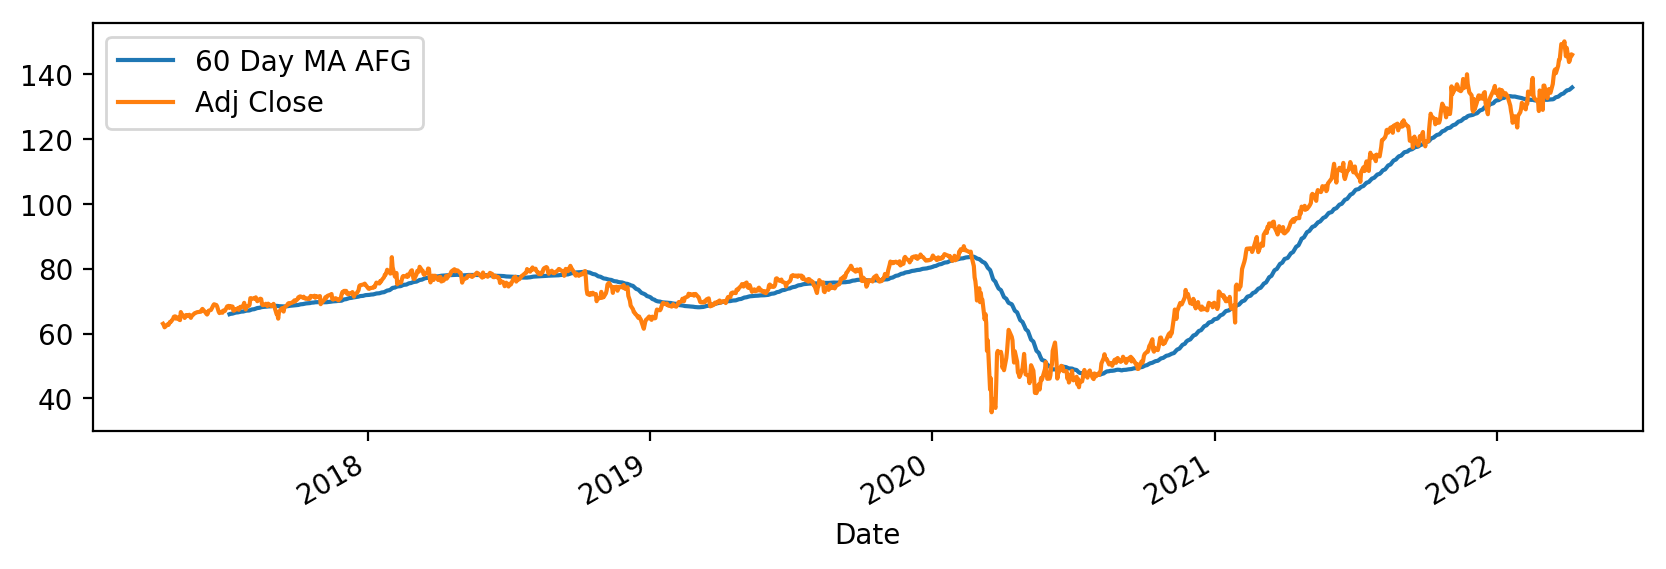

In [98]:
plt.figure(figsize=(10, 3), dpi=200)
afg['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA AFG')
afg['Adj Close'].plot(label='Adj Close')
plt.legend()

b. - Bollinger bands

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.

Bollinger Bands consist of an N-period moving average (MA), an upper band at K times an N-period standard deviation above the moving average (MA + Kσ), and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ). The chart thus expresses arbitrary choices or assumptions of the user, and is not strictly about the price data alone.

Typical values for N and K are 20 days and 2, respectively.

Source: https://en.wikipedia.org/wiki/Bollinger_Bands


For the creation of this scenario bollinger bands, the parameters used will be with N=20 days for the rolling rate of the moving average and K=2 for the multiplication of the standard deviation.
Same stock (AFG) will be used

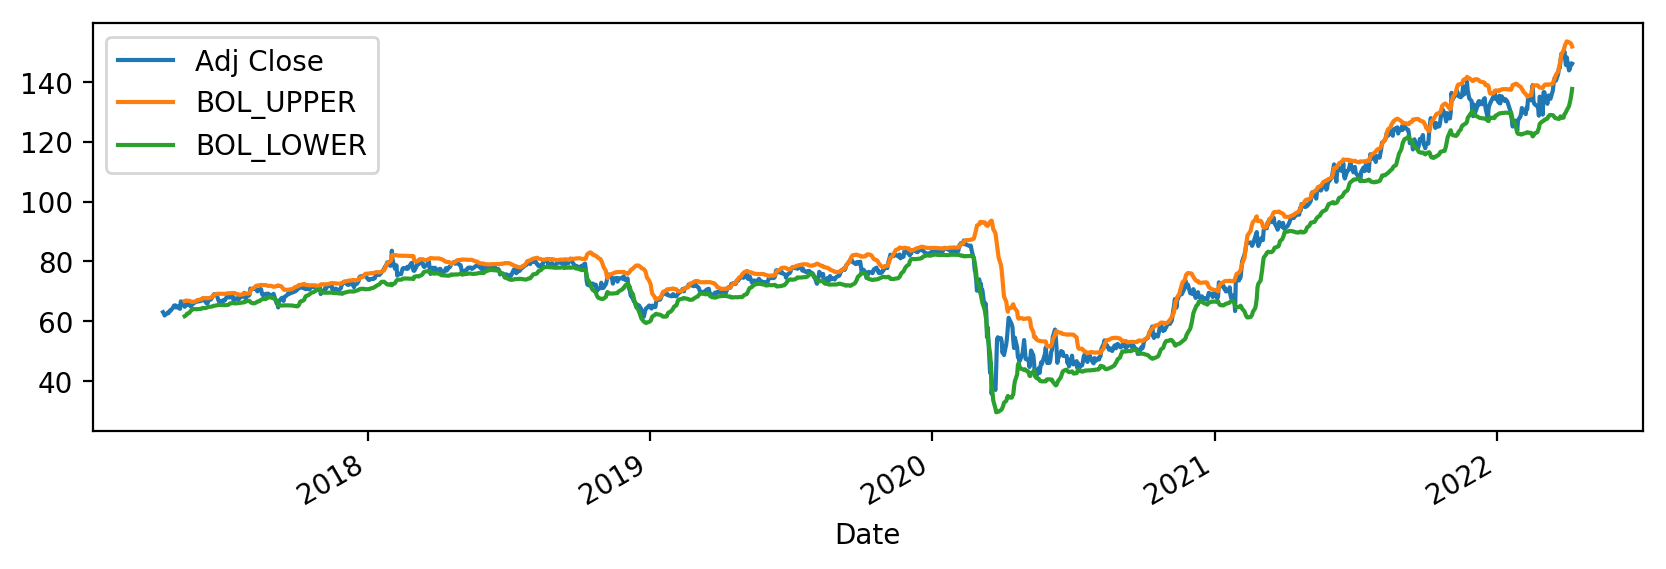

In [99]:
fig,ax = plt.subplots(figsize=(10,3),dpi=200)
afg['MA'] = afg['Adj Close'].rolling(20).mean()
afg['STD'] = afg['Adj Close'].rolling(20).std()
afg['BOL_UPPER'] = afg['MA'] + 2*afg['STD']
afg['BOL_LOWER'] = afg['MA'] - 2*afg['STD']
afg[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)